In [1]:
def extraction(signal_sample):
    sal=0
    #for i in range(0,len(signal_sample)):
        #if signal_sample[i]<0:
        #sal=sal+abs(signal_sample[i])
    sal=min(signal_sample)
    #sal=sal
    return sal

In [2]:
def M_feat(signal_gen,person):
    w=3072
    n=0
    signal_extract=np.zeros((w))
    features=np.zeros((person,4))
    t = np.linspace(0, 3, w)

    for p in range(0,person):
        features[p,3]=p
        for e in range (0,3):
            signal_sample=signal_gen[0+w*n:w+w*n]

            for i in range(0,w):
                if i<1590 or i>1835:
                #if i<1590 or i>1700:
                    signal_extract[i]=0
                else:
                    signal_extract[i]=signal_sample[i]
    
            f=extraction(signal_extract)
            features[p,e]=f
            #fig = plt.figure()
            #print('Person:',p+1,'   Experiment:',e+1,'   Feature:',f)
            #plt.plot(t,signal_sample), plt.title('Brain Signal')
            #plt.plot(t,signal_extract,linestyle='--')
            #plt.xlabel("time(s)")
            #plt.ylabel("Amplitud(uV)")
            #plt.show()
            #fig.savefig('Imagenes_EEG\Original.jpg')
            n=n+1
    return features

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import statistics

df = pd.read_csv('Proyecto_Final/ERPdata.csv', delimiter=',')
df2 = pd.read_csv('Proyecto_Final/demographic.csv', delimiter=',')
df.dataframeName = 'ERPdata.csv'
df2.dataframeName = 'demographic.csv'
nRow, nCol = df.shape
nRow2, nCol2 = df2.shape

person=81
#32 controls and 34 patients
#32 controls and 49 patients

names2 = df2.Group
Y=names2[:person]

#electrodes=Fz	FCz	Cz	FC3	FC4	C3	C4	CP3	CP4
names_1=df.Fz 
names_2=df.FCz 
names_3=df.Cz
names_4=df.FC3

signal_gen=np.array(names_1)
M1=M_feat(signal_gen,person)

signal2_gen=np.array(names_2)
M2=M_feat(signal2_gen,person)

signal3_gen=np.array(names_3)
M3=M_feat(signal3_gen,person)

signal4_gen=np.array(names_4)
M4=M_feat(signal4_gen,person)

(746496,)
(3072,)
Person: 1. Experiment: 1


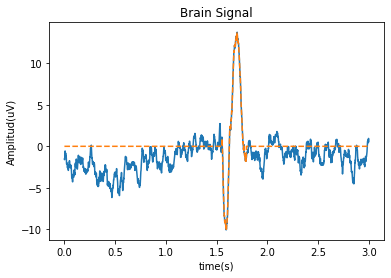

In [4]:
print(str(names_3.shape)) # 746496 = 3072 x 81 x 3

w=3072
t = np.linspace(0, 3, w)
n=1

#signal_prove = names_3[w*n:w+w*n]
signal_prove = np.array(names_3[0+w*n:w+w*n]).reshape(w,)
print(str(signal_prove.shape))

signal_extract=np.zeros(w,)

for i in range(0,w):
    if i<1590 or i>1835:
        signal_extract[i]=0
    else:
        signal_extract[i]=signal_prove[i]
          
fig = plt.figure()
print('Person: 1. Experiment: 1')
plt.plot(t,signal_prove), plt.title('Brain Signal')
plt.plot(t,signal_extract,linestyle='--')
plt.xlabel("time(s)")
plt.ylabel("Amplitud(uV)")
plt.show()

In [5]:
features=(M1+M2+M3)/3


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import SGDClassifier


X=features

    
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=4)
print("Xtrain_shape: "+str(X_train.shape)+".  Y_test_shape: "+str(Y_test.shape))

#clf_lr = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
#clf_lr.fit(X_train, Y_train==1)

clf_lr = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200).fit(X_train, Y_train==1)


cross_val_score(clf_lr, X_train, Y_train, cv=3, scoring="accuracy")

Xtrain_shape: (60, 4).  Y_test_shape: (21,)


array([0.7 , 0.75, 0.9 ])

In [7]:
from sklearn.model_selection import cross_val_predict
Y_train_pred = cross_val_predict(clf_lr, X_train, Y_train, cv=3)

confusion_matrix(Y_train, Y_train_pred)

array([[16,  7],
       [ 6, 31]])

In [8]:
precision_score(Y_train, Y_train_pred)

0.8157894736842105

In [9]:
recall_score(Y_train, Y_train_pred)

0.8378378378378378